##### Importing required libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

##### Reading from file

In [2]:
df1 = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q4/q4x.dat', header=None, delimiter="  ", engine="python")
df2 = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q4/q4y.dat', header=None)

##### Creating a dataframe

In [3]:
frames = [df1, df2]
df = pd.concat(frames, axis=1, ignore_index=True)
df.rename(columns={0:"X1",1:"X2",2:"Y_char"},inplace=True)
print(df)

     X1   X2  Y_char
0   108  368  Alaska
1   131  355  Alaska
2   105  469  Alaska
3    86  506  Alaska
4    99  402  Alaska
..  ...  ...     ...
95  150  339  Canada
96  124  341  Canada
97  125  346  Canada
98  153  352  Canada
99  108  339  Canada

[100 rows x 3 columns]


In [4]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['Y'] = labelencoder.fit_transform(df['Y_char'])

print(df)

     X1   X2  Y_char  Y
0   108  368  Alaska  0
1   131  355  Alaska  0
2   105  469  Alaska  0
3    86  506  Alaska  0
4    99  402  Alaska  0
..  ...  ...     ... ..
95  150  339  Canada  1
96  124  341  Canada  1
97  125  346  Canada  1
98  153  352  Canada  1
99  108  339  Canada  1

[100 rows x 4 columns]


##### Describing the dataframe

In [5]:
df.describe()

,X1,X2,Y
count,100.000000,100.000000,100.000000
mean,117.920000,398.140000,0.500000
std,26.001041,46.240046,0.502519
min,53.000000,301.000000,0.000000
25%,99.000000,367.000000,0.000000
50%,117.500000,396.500000,0.500000
75%,140.000000,428.250000,1.000000
max,179.000000,511.000000,1.000000


##### Normalizing the data

In [6]:
norm_df = df.copy()
norm_df["X1"] = (norm_df["X1"] - norm_df["X1"].mean())/norm_df["X1"].std()
norm_df["X2"] = (norm_df["X2"] - norm_df["X2"].mean())/norm_df["X2"].std()

norm_df

,X1,X2,Y_char,Y
0,-0.381523,-0.651816,Alaska,0
1,0.503057,-0.932958,Alaska,0
2,-0.496903,1.532438,Alaska,0
3,-1.227643,2.332610,Alaska,0
4,-0.727663,0.083477,Alaska,0
...,...,...,...,...
95,1.233797,-1.278978,Canada,1
96,0.233837,-1.235725,Canada,1
97,0.272297,-1.127594,Canada,1
98,1.349177,-0.997836,Canada,1


In [7]:
norm_df.describe()

,X1,X2,Y
count,1.000000e+02,1.000000e+02,100.000000
mean,-8.382184e-17,2.908784e-16,0.500000
std,1.000000e+00,1.000000e+00,0.502519
min,-2.496823e+00,-2.100776e+00,0.000000
25%,-7.276632e-01,-6.734422e-01,0.000000
50%,-1.615320e-02,-3.546709e-02,0.500000
75%,8.491968e-01,6.511672e-01,1.000000
max,2.349137e+00,2.440742e+00,1.000000


###### Plotting the data with different colors

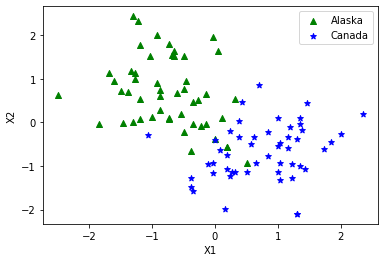

In [8]:
fig = plt.figure()
markers = ["o", "*"]
alaska_points_x = []
alaska_points_y = []
canada_points_x = []
canada_points_y = []
for i in range(len(norm_df["X1"])):
    if norm_df["Y"][i] == 0:
#         plt.plot(norm_df["X1"][i], norm_df["X2"][i], marker='^', color="green")
        alaska_points_x.append(norm_df["X1"][i])
        alaska_points_y.append(norm_df["X2"][i])
    else:
#         plt.plot(norm_df["X1"][i], norm_df["X2"][i], marker='o', color="blue")
        canada_points_x.append(norm_df["X1"][i])
        canada_points_y.append(norm_df["X2"][i])
        
plt.scatter(alaska_points_x,alaska_points_y, marker="^", color="green")
plt.scatter(canada_points_x,canada_points_y, marker='*', color="blue")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["Alaska","Canada"])
plt.savefig("xy_plot.png")
plt.show()

###### Sigmoid function

In [9]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

##### Gaussian Discriminative Analysis

###### Linear Discriminative Analysis

In [10]:
def get_mu_k(m, norm_df, k):
    temp_mu = np.zeros((2,1))
    count_k = 0
    
    for i in range(m):
        if norm_df["Y"][i] == k:
            temp_mu += np.array([[norm_df["X1"][i]],[norm_df["X2"][i]]])
            count_k += 1
            
    temp_mu = (1/count_k)*temp_mu
    return temp_mu

In [11]:
def get_common_cov_mat(m, norm_df, mu_0, mu_1):
    temp_cov_mat = np.zeros((2,2))
    
    for i in range(m):
        x = np.array([[norm_df["X1"][i]],[norm_df["X2"][i]]])
        if norm_df["Y"][i] == 0:
            temp_cov_mat += np.matmul((x - mu_0),(x - mu_0).T)
        elif norm_df["Y"][i] == 1:
            temp_cov_mat += np.matmul((x - mu_1),(x - mu_1).T)
            
    temp_cov_mat = (1/m)*temp_cov_mat
    return temp_cov_mat

In [12]:
def get_cov_mat_k(m, norm_df, mu, k):
    temp_cov_mat = np.zeros((2,2))
    count_k = 0
    
    for i in range(m):
        x = np.array([[norm_df["X1"][i]],[norm_df["X2"][i]]])
        if norm_df["Y"][i] == k:
            temp_cov_mat += np.matmul((x - mu),(x - mu).T)
            count_k += 1
            
    temp_cov_mat = (1/count_k)*temp_cov_mat
    return temp_cov_mat

In [13]:
m = norm_df["X1"].count()
phi = norm_df["Y"].sum()/m

mu_0 = get_mu_k(m, norm_df, k=0)
mu_1 = get_mu_k(m, norm_df, k=1)

cov_mat = get_common_cov_mat(m, norm_df, mu_0, mu_1)
cov_mat_inv = np.linalg.inv(cov_mat)

In [14]:
mu_0

array([[-0.75150837],
       [ 0.68166023]])

In [15]:
mu_1

array([[ 0.75150837],
       [-0.68166023]])

In [16]:
cov_mat

array([[ 0.42523517, -0.02224756],
       [-0.02224756,  0.52533933]])

In [17]:
cov_mat_inv

array([[2.35686181, 0.09981057],
       [0.09981057, 1.90775842]])

###### Getting the decision boundary

In [18]:
a = np.matmul(mu_1.T,cov_mat_inv) - np.matmul(mu_0.T,cov_mat_inv)
b = 0.5*(np.matmul(np.matmul(mu_0.T,cov_mat_inv),mu_0) - np.matmul(np.matmul(mu_1.T, cov_mat_inv),mu_1)) + np.log(phi/(1-phi))

Equation of the estimator line is a[0][0] * x1 + a[0][1] * x2 + b[0][0] = 0

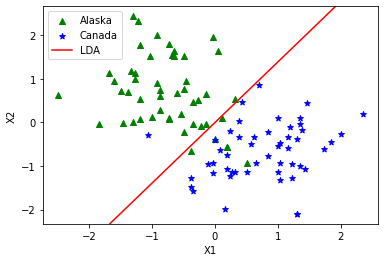

In [19]:
fig = plt.figure()
markers = ["o", "*"]

plt.scatter(alaska_points_x,alaska_points_y, marker="^", color="green")
plt.scatter(canada_points_x,canada_points_y, marker='*', color="blue")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axline((0,(-1)*b[0][0]/a[0][1]), slope=(-1)*a[0][0]/a[0][1], color="red")
plt.legend(["Alaska","Canada","LDA"])
plt.savefig("xy_plot_lda.png")
plt.show()

In [20]:
%matplotlib notebook

###### Linear hyperplane

In [21]:
size=100
x = np.linspace(-2,2,size)
y = np.linspace(-2,2,size)
Z = np.zeros((size,size))

X,Y = np.meshgrid(x,y)
for i in range(size):
    for j in range(size):
        z = sigmoid(a[0][0]*X[i][j] + a[0][1]*Y[i][j] + b[0][0])
        Z[i][j] = z

<IPython.core.display.Javascript object>


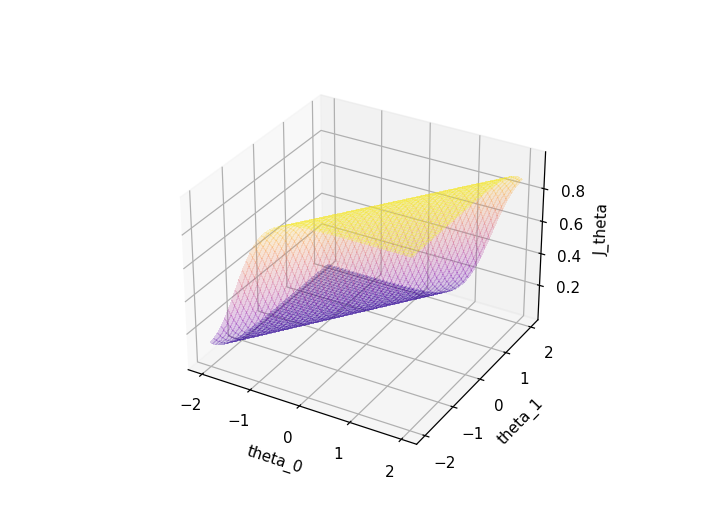

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap="plasma",linewidth=0,antialiased=False, alpha=0.2)
ax.set_xlabel("theta_0")
ax.set_ylabel("theta_1")
ax.set_zlabel("J_theta")
plt.savefig("loss_3d_lda.png")
plt.show()

<IPython.core.display.Javascript object>


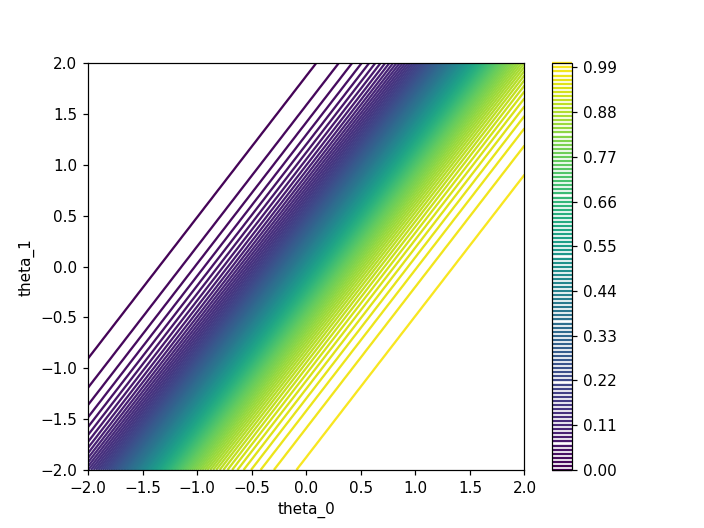

In [23]:
fig = plt.figure()
plt.contour(x,y,Z,100)
plt.colorbar()
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.savefig("contour_lda.png")
plt.show()

###### Quadratic Discriminative Analysis

In [24]:
cov_mat_0 = get_cov_mat_k(m, norm_df, mu_0, k=0)
cov_mat_1 = get_cov_mat_k(m, norm_df, mu_1, k=1)

cov_mat_0_inv = np.linalg.inv(cov_mat_0)
cov_mat_1_inv = np.linalg.inv(cov_mat_1)

In [25]:
cov_mat_0

array([[ 0.37777389, -0.15331651],
       [-0.15331651,  0.6412598 ]])

In [26]:
cov_mat_1

array([[0.47269646, 0.10882139],
       [0.10882139, 0.40941887]])

In [27]:
cov_mat_0_inv

array([[2.93153696, 0.70089066],
       [0.70089066, 1.72700379]])

In [28]:
cov_mat_1_inv

array([[ 2.25340787, -0.59894402],
       [-0.59894402,  2.60168256]])

Equation of estimator curve is x.T * A * x + b * x + c = 0

In [29]:
A = np.zeros((2,2))
B = np.zeros((2,1))
c = np.zeros((1,1))

A = cov_mat_0_inv - cov_mat_1_inv
B = 2*(np.matmul(mu_1.T,cov_mat_1_inv) - np.matmul(mu_0.T,cov_mat_0_inv))
c = np.matmul(np.matmul(mu_0.T,cov_mat_0_inv),mu_0) - np.matmul(np.matmul(mu_1.T,cov_mat_1_inv),mu_1) + [[np.log(np.linalg.det(cov_mat_0)/np.linalg.det(cov_mat_1))]]

In [30]:
A

array([[ 0.67812909,  1.29983468],
       [ 1.29983468, -0.87467877]])

In [31]:
B

array([[ 7.65407291, -5.74815913]])

In [32]:
c

array([[-1.16957397]])

###### Quadratic hyperplane

In [33]:
size=100
x_ = np.linspace(-2,2,size)
y_ = np.linspace(-2,2,size)
Z = np.zeros((size,size))

X,Y = np.meshgrid(x_,y_)
for i in range(size):
    for j in range(size):
        x = np.array([[X[i][j]],[Y[i][j]]])
        z = np.matmul(np.matmul(x.T,A),x) + np.matmul(B,x) + c
        Z[i][j] = sigmoid(z[0][0])

<IPython.core.display.Javascript object>


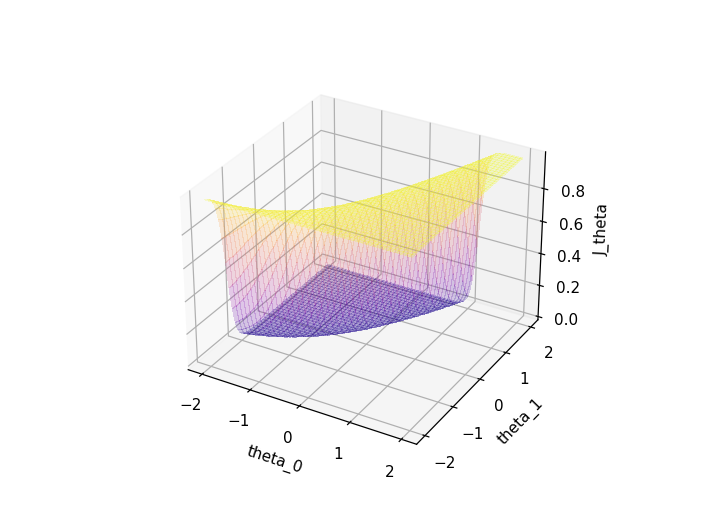

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap="plasma",linewidth=0,antialiased=False, alpha=0.2)
ax.set_xlabel("theta_0")
ax.set_ylabel("theta_1")
ax.set_zlabel("J_theta")
plt.savefig("loss_3d_qda.png")
plt.show()

<IPython.core.display.Javascript object>


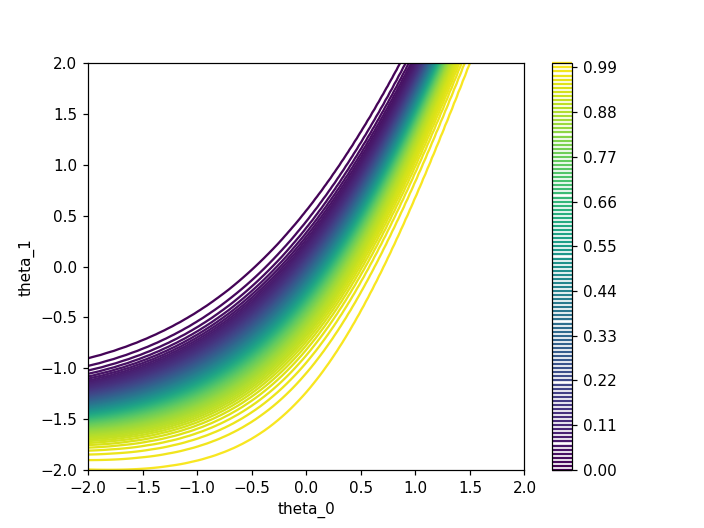

In [35]:
fig = plt.figure()
plt.contour(x_,y_,Z,100)
plt.colorbar()
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.savefig("contour_qda.png")
plt.show()

###### Getting the decision boundary for QDA

<IPython.core.display.Javascript object>


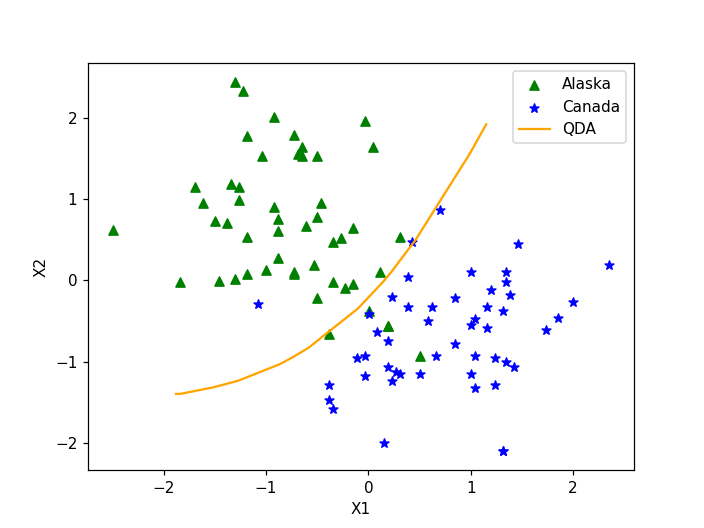

In [36]:
fig = plt.figure()
thresh = 0.01
markers = ["o", "*"]

plt.scatter(alaska_points_x,alaska_points_y, marker="^", color="green")
plt.scatter(canada_points_x,canada_points_y, marker='*', color="blue")

# plt.axline((0,(-1)*b[0][0]/a[0][1]), slope=(-1)*a[0][0]/a[0][1], color="red")

points_x = []
points_y = []
for i in range(size):
    for j in range(size):
        if Z[i][j] < 0.5+thresh and Z[i][j] > 0.5+(-1)*thresh:
            points_x.append(X[i][j])
            points_y.append(Y[i][j])

plt.plot(points_x,points_y, color="orange")
plt.xlabel("X1")

plt.ylabel("X2")
plt.legend(["Alaska", "Canada", "QDA"])
plt.savefig("xy_plot_qda.png")
plt.show()

###### Combined plot

<IPython.core.display.Javascript object>


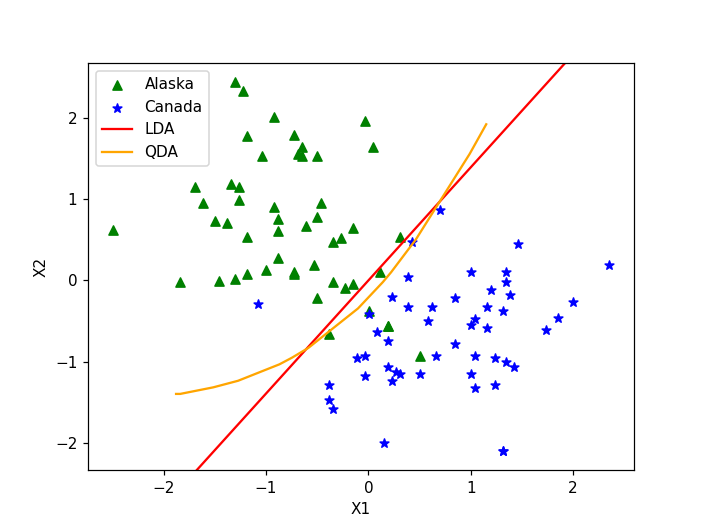

In [37]:
fig = plt.figure()
thresh = 0.01
markers = ["o", "*"]

plt.scatter(alaska_points_x,alaska_points_y, marker="^", color="green")
plt.scatter(canada_points_x,canada_points_y, marker='*', color="blue")

plt.axline((0,(-1)*b[0][0]/a[0][1]), slope=(-1)*a[0][0]/a[0][1], color="red")

points_x = []
points_y = []
for i in range(size):
    for j in range(size):
        if Z[i][j] < 0.5+thresh and Z[i][j] > 0.5+(-1)*thresh:
            points_x.append(X[i][j])
            points_y.append(Y[i][j])

plt.plot(points_x,points_y, color="orange")
plt.xlabel("X1")

plt.ylabel("X2")
plt.legend(["Alaska", "Canada", "LDA", "QDA"])
plt.savefig("xy_plot_lda_qda.png")
plt.show()